# Chapter_3_Solutions

## Question 1

### Step 1. Setup

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from pynwb import NWBHDF5IO

# Read in our file
io = NWBHDF5IO('../Chapter_02/000006/sub-anm369962/sub-anm369962_ses-20170310.nwb', 'r')
nwb_file = io.read()

# Get the units data frame
units_df = nwb_file.units.to_dataframe()
 
# Select only "Fair" units
fair_units_df = units_df[units_df['quality']=='Fair']

# Print the subsetted dataframe
fair_units_df.head()

,depth,quality,cell_type,spike_times,electrodes
id,,,,,
2,665.0,Fair,unidentified,"[329.95417899999956, 330.01945899999953, 330.0...",x y z imp ...
5,715.0,Fair,unidentified,"[331.09961899999956, 332.14505899999955, 333.3...",x y z imp ...
6,715.0,Fair,unidentified,"[329.91129899999953, 329.92869899999954, 330.0...",x y z imp ...
7,765.0,Fair,unidentified,"[330.26357899999954, 330.3849389999996, 330.60...",x y z imp ...
10,815.0,Fair,unidentified,"[329.8969389999996, 329.94389899999953, 329.95...",x y z imp ...


In [37]:
fair_units_df['spike_times'].to_numpy()

array([array([ 329.954179,  330.019459,  330.070619, ..., 2088.111   ,
       2088.16108 , 2088.29524 ]),
       array([ 331.099619,  332.145059,  333.362499, ..., 1408.024988,
       1408.143628, 1408.155148]),
       array([ 329.911299,  329.928699,  330.096739, ..., 1403.192068,
       1405.221428, 1408.222908]),
       array([ 330.263579,  330.384939,  330.601699, ..., 2082.970833,
       2083.076393, 2083.9116  ]),
       array([ 329.896939,  329.943899,  329.954979, ..., 2089.02168 ,
       2089.04324 , 2089.0536  ]),
       array([ 330.083219,  331.017099,  331.198899,  331.269419,  331.497899,
        332.665939,  332.714139,  332.855819,  332.968739,  333.468299,
        333.499819,  333.531979,  333.828579,  334.619019,  341.008506,
        341.251706,  341.681626,  341.736026,  342.024866,  343.518866,
        344.688186,  346.003386,  346.896026,  346.52896 ,  346.60576 ,
        348.286001,  351.530361,  351.600881,  363.806269,  364.432869,
        364.439069,  361.482311

In [35]:
spike_array = np.array(list(fair_units_df['spike_times']))
spike_array


array([array([ 329.954179,  330.019459,  330.070619, ..., 2088.111   ,
       2088.16108 , 2088.29524 ]),
       array([ 331.099619,  332.145059,  333.362499, ..., 1408.024988,
       1408.143628, 1408.155148]),
       array([ 329.911299,  329.928699,  330.096739, ..., 1403.192068,
       1405.221428, 1408.222908]),
       array([ 330.263579,  330.384939,  330.601699, ..., 2082.970833,
       2083.076393, 2083.9116  ]),
       array([ 329.896939,  329.943899,  329.954979, ..., 2089.02168 ,
       2089.04324 , 2089.0536  ]),
       array([ 330.083219,  331.017099,  331.198899,  331.269419,  331.497899,
        332.665939,  332.714139,  332.855819,  332.968739,  333.468299,
        333.499819,  333.531979,  333.828579,  334.619019,  341.008506,
        341.251706,  341.681626,  341.736026,  342.024866,  343.518866,
        344.688186,  346.003386,  346.896026,  346.52896 ,  346.60576 ,
        348.286001,  351.530361,  351.600881,  363.806269,  364.432869,
        364.439069,  361.482311

### Step 2. Modify function to take an array and average

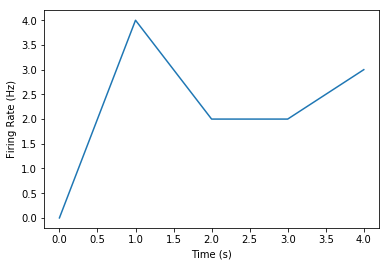

In [20]:
def plot_firing_rates(spike_array, start_time = None, end_time = None):
        
    # Take average across time
    spike_times = spike_array.mean(axis=1)
    
    # Assign total number of bins 
    num_bins = int(np.ceil(spike_times[-1]))
    binned_spikes = np.empty(num_bins)
  
    # Assign the frequency of spikes over time
    for j in range(num_bins):
        binned_spikes[j] = len(spike_times[(spike_times>j)&(spike_times<j+1)])
          
    plt.plot(binned_spikes)
    plt.xlabel('Time (s)')
    plt.ylabel('Firing Rate (Hz)')
        
    if (start_time != None) and (end_time != None):
        plt.xlim(start_time, end_time)
        
plot_firing_rates(spike_array)

## Question 2

### Step 1. Read in our file & create intervals dataframe

In [26]:
# Select the group of interest from the nwb file 
intervals = nwb_file.intervals

# Pull out trials and assign it as a dataframe
interval_trials_df = intervals['trials'].to_dataframe()
interval_trials_df.head()

,start_time,stop_time,type,response,stim_present,is_good,cue_start_time,pole_in_time,pole_out_time
id,,,,,,,,,
1,323.171,NaN,lick right,early lick,0,1,7.49698,3.93949,5.12748
2,329.570,NaN,lick right,early lick,0,1,11.81280,4.94181,5.94198
3,335.971,NaN,lick right,incorrect,0,1,6.62964,4.12915,5.12931
4,342.371,NaN,lick right,incorrect,0,1,6.41964,3.91915,4.91931
5,348.289,NaN,lick right,incorrect,0,1,12.66990,10.16930,11.16950


### Step 2. Generate dataframes for correct and incorrect trials

In [24]:
correct_df = interval_trials_df[interval_trials_df['response']=='correct']
correct_df.head()

,start_time,stop_time,type,response,stim_present,is_good,cue_start_time,pole_in_time,pole_out_time
id,,,,,,,,,
11,387.171,NaN,lick right,correct,0,1,6.38830,3.88765,4.88781
12,393.571,NaN,lick right,correct,0,1,7.68014,5.17965,6.17981
13,399.971,NaN,lick right,correct,0,1,7.23147,4.73098,5.73114
14,406.371,NaN,lick left,correct,0,1,7.24897,4.74848,5.74864
15,412.771,NaN,lick left,correct,0,1,6.51681,4.01615,5.01631


In [25]:
incorrect_df = interval_trials_df[interval_trials_df['response']=='incorrect']
incorrect_df.head()

,start_time,stop_time,type,response,stim_present,is_good,cue_start_time,pole_in_time,pole_out_time
id,,,,,,,,,
3,335.971,NaN,lick right,incorrect,0,1,6.62964,4.12915,5.12931
4,342.371,NaN,lick right,incorrect,0,1,6.41964,3.91915,4.91931
5,348.289,NaN,lick right,incorrect,0,1,12.66990,10.16930,11.16950
6,355.171,NaN,lick right,incorrect,0,1,6.48931,3.98882,4.98898
7,361.571,NaN,lick right,incorrect,0,1,6.59331,4.09282,5.09298


In [29]:
correct_starts = correct_df['start_time']
incorrect_starts = incorrect_df['start_time']

plot_firing_rates()

## Question 4

In our dataframe, the mean spike rates for each unit can be found under the `firing_rate` column. Let, look at the distibution of firing rates across all brain areas using a violinplot. We will filter out units that do not meet our criteria for `snr` and `isi_violations`, like we did in the previous section. 

In [12]:
# Return units dataframe with specified snr and isi
units_df = session.units
good_snr = units_df[units_df['snr']>2]
good_units_df = good_snr[good_snr['isi_violations']<0.1]

# Plot our distribution
plt.figure(figsize = (10,5))
plt.boxplot()
sns.violinplot(y='firing_rate', x='ecephys_structure_acronym',data = good_units_df)
plt.title('Violinplot of Firing Rates across Brain Structures')
plt.show()

NameError: name 'sns' is not defined

<Figure size 720x360 with 0 Axes>